## DSLabs

In [25]:
%run "scripts/dslabs_functions.py"

# data functions

In [1]:
%run "scripts/data_functions.py"

data_functions loaded


# Load

In [2]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_pre_proc.csv'

file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False

data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    int64  
 5   Checkouts                        427 non-null    int64  
 6   E-commerce purchases             389 non-null    float64
 7   Average purchase revenue         389 non-null    float64
 8   Purchase revenue                 389 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             389 non-null    float64
 11  ARPPU                            389 non-null    float64
 12  Vie

In [3]:
series: Series = data['Sessions']


# Dimensionality

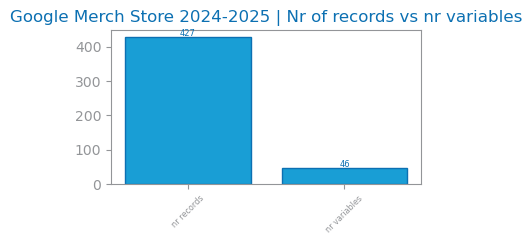

In [4]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

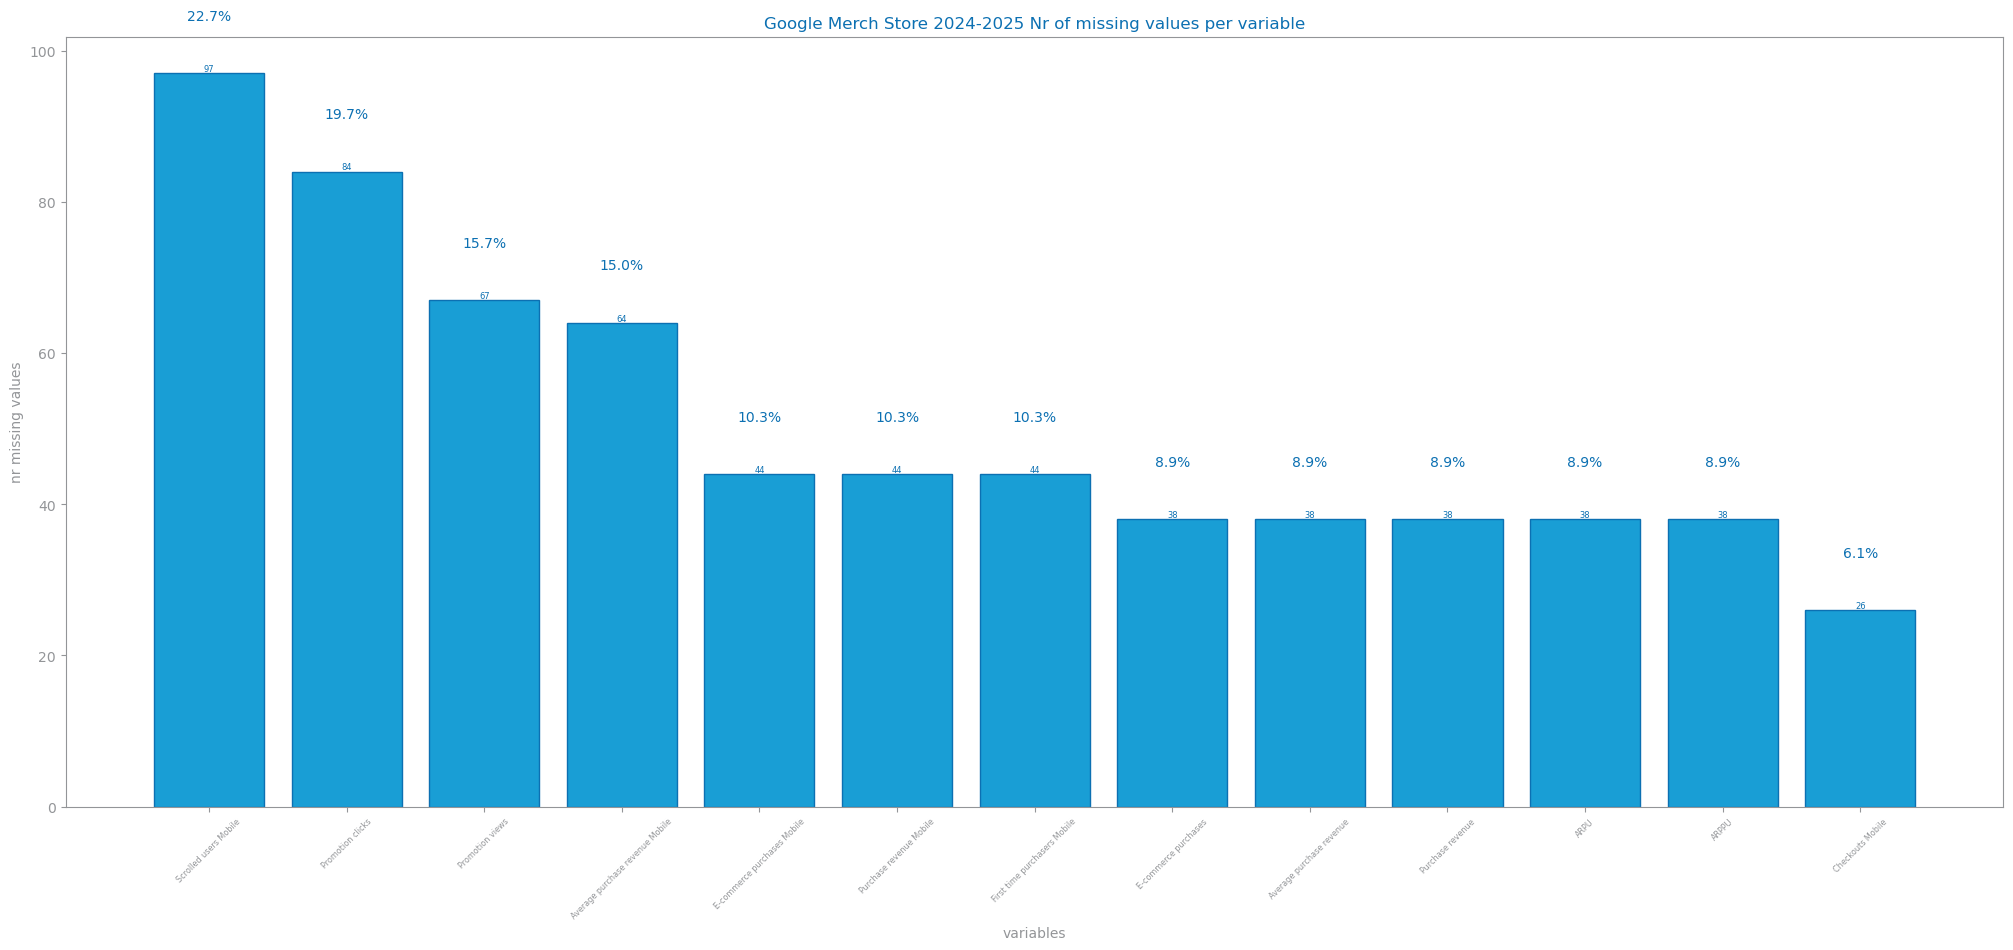

In [5]:
from matplotlib.pyplot import figure, savefig, show, text
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

## Variables Type

In [6]:
data.dtypes


Sessions                             int64
Seven-day active users               int64
28-day active users                  int64
Events per session                 float64
Add to baskets                       int64
Checkouts                            int64
E-commerce purchases               float64
Average purchase revenue           float64
Purchase revenue                   float64
Average session duration           float64
ARPU                               float64
ARPPU                              float64
Views per user                     float64
Total users                          int64
Promotion views                    float64
Promotion clicks                   float64
Sessions Mobile                      int64
Seven-day active users Mobile        int64
28-day active users Mobile           int64
New users Mobile                     int64
Scrolled users Mobile              float64
Engaged sessions Mobile              int64
Views Mobile                         int64
Event count

In [7]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['Sessions', 'Seven-day active users', '28-day active users', 'Events per session', 'Add to baskets', 'Checkouts', 'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue', 'Average session duration', 'ARPU', 'ARPPU', 'Views per user', 'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile', 'Seven-day active users Mobile', '28-day active users Mobile', 'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile', 'Event count Mobile', 'Events per session Mobile', 'Item-list view events Mobile', 'Item view events Mobile', 'Add to baskets Mobile', 'Checkouts Mobile', 'E-commerce purchases Mobile', 'Average purchase revenue Mobile', 'Purchase revenue Mobile', 'First time purchasers Mobile', 'Average session duration Mobile', 'Sessions (not set)', 'Sessions cpc', 'Sessions cpm', 'Sessions email', 'Sessions organic', 'Sessions other', 'Sessions referral', 'season', 'commercial_season'], 'binary': ['Sessions affiliate', 'is

### variables per type plot

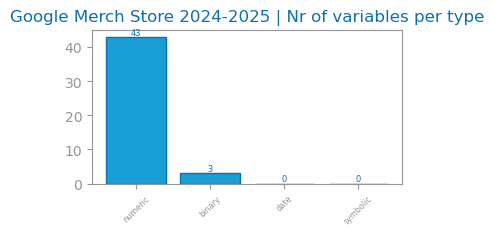

In [8]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [9]:
summary5: DataFrame = data.describe(include="all")
summary5

Sessions  Seven-day active users  28-day active users  \
count    427.000000              427.000000           427.000000   
mean    2096.981265            10567.112412         38404.140515   
std     1078.436107             3632.601576         12293.299375   
min       22.000000              780.000000           780.000000   
25%     1463.000000             8326.500000         30502.500000   
50%     1984.000000            10800.000000         40024.000000   
75%     2545.500000            12269.500000         48328.000000   
max    11239.000000            20447.000000         60050.000000   

       Events per session  Add to baskets    Checkouts  E-commerce purchases  \
count          427.000000      427.000000   427.000000            389.000000   
mean            13.742619      329.644028   120.615925             42.848329   
std              3.952863      478.333433   154.440023             48.319972   
min              4.343862        0.000000     0.000000              3.000000   
25%             11.470473      123.000000    49.500000             19.000000   
50%             14.038885      279.000000    97.000000             35.000000   
75%             16.004337      409.500000   148.500000             49.000000   
max             34.000000     7928.000000  2340.000000            671.000000   

       Average purchase revenue  Purchase revenue  Average session duration  \
count                389.000000        389.000000                427.000000   
mean                 143.968857       6366.332519                180.607370   
std                   60.458969       7006.572387                 54.933684   
min                   33.288369        258.800000                  1.653463   
25%                  103.742222       2300.400000                138.840912   
50%                  130.306111       4792.130000                184.318082   
75%                  169.837865       7934.950000                215.089888   
max                  464.092353      73565.490000                361.036473   

       ...  Sessions cpc  Sessions cpm  Sessions email  Sessions organic  \
count  ...    427.000000    427.000000      427.000000        427.000000   
mean   ...     95.847775      0.470726       65.601874        286.948478   
std    ...     87.643365      1.153057      236.352051        138.374253   
min    ...      0.000000      0.000000        0.000000          4.000000   
25%    ...     18.000000      0.000000        5.000000        180.500000   
50%    ...     71.000000      0.000000       16.000000        280.000000   
75%    ...    165.500000      0.000000       44.000000        347.500000   
max    ...    360.000000      9.000000     2751.000000       1042.000000   

       Sessions other  Sessions referral      season  commercial_season  \
count      427.000000         427.000000  427.000000         427.000000   
mean         1.653396         164.238876    0.698949          -0.470871   
std          2.798685         264.319534    1.652479           1.457896   
min          0.000000           0.000000   -1.570796          -2.094395   
25%          0.000000          36.000000    0.000000          -1.047198   
50%          0.000000          75.000000    0.000000          -1.047198   
75%          3.000000         181.000000    1.570796           0.000000   
max         14.000000        2663.000000    3.141593           3.141593   

       is_weekend  is_holiday  
count  427.000000  427.000000  
mean     0.285714    0.028103  
std      0.452284    0.165461  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000  

[8 rows x 46 columns]

## Numeric Variables

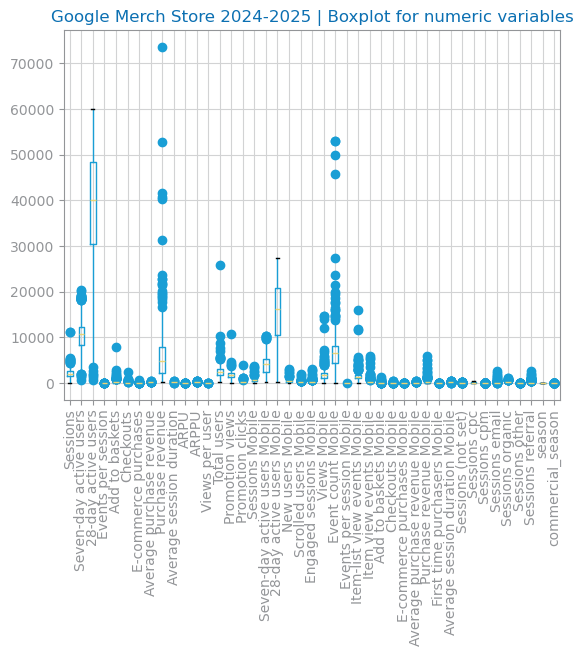

In [10]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    data[numeric].boxplot(rot=90)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

# multivariate chart

Nr. Records =  (427, 46)
First timestamp 2024-01-04 00:00:00
Last timestamp 2025-03-05 00:00:00


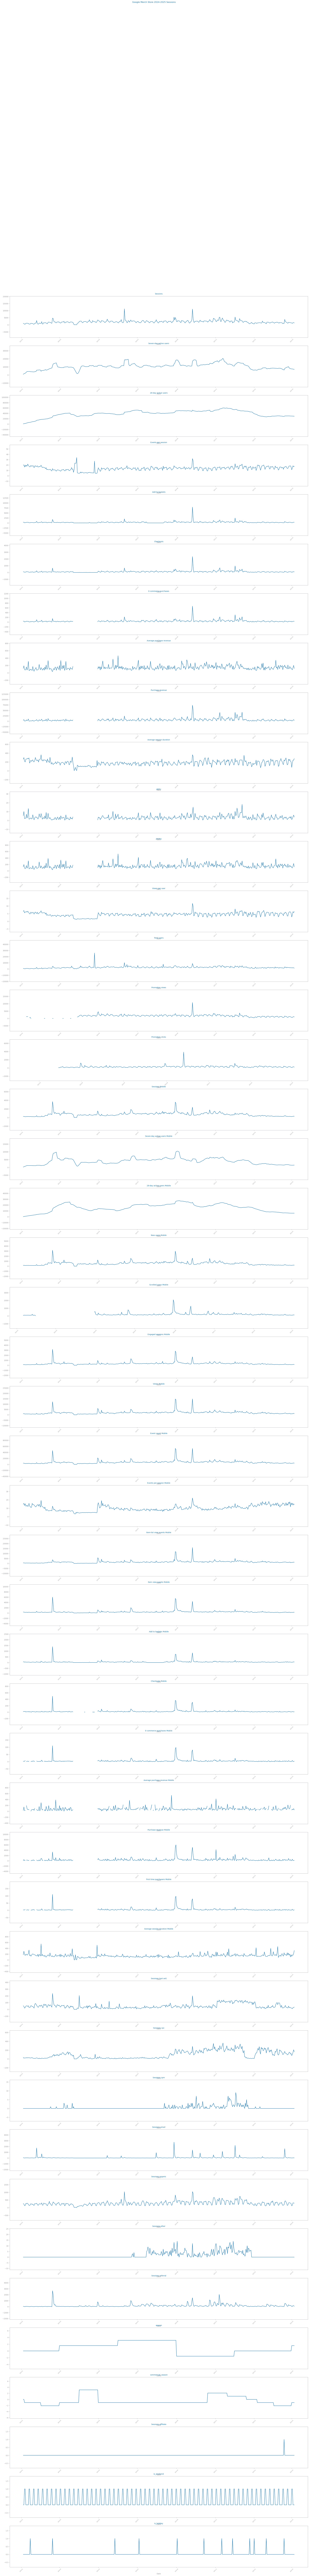

In [11]:
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])


target = "Sessions"

not_symbolic_data=data[variable_types["numeric"] + variable_types["date"]+variable_types["binary"]]

plot_ts_multivariate_chart(not_symbolic_data, title=f"{file_tag} {target}")
show()

## numeric variables distribution breakdown

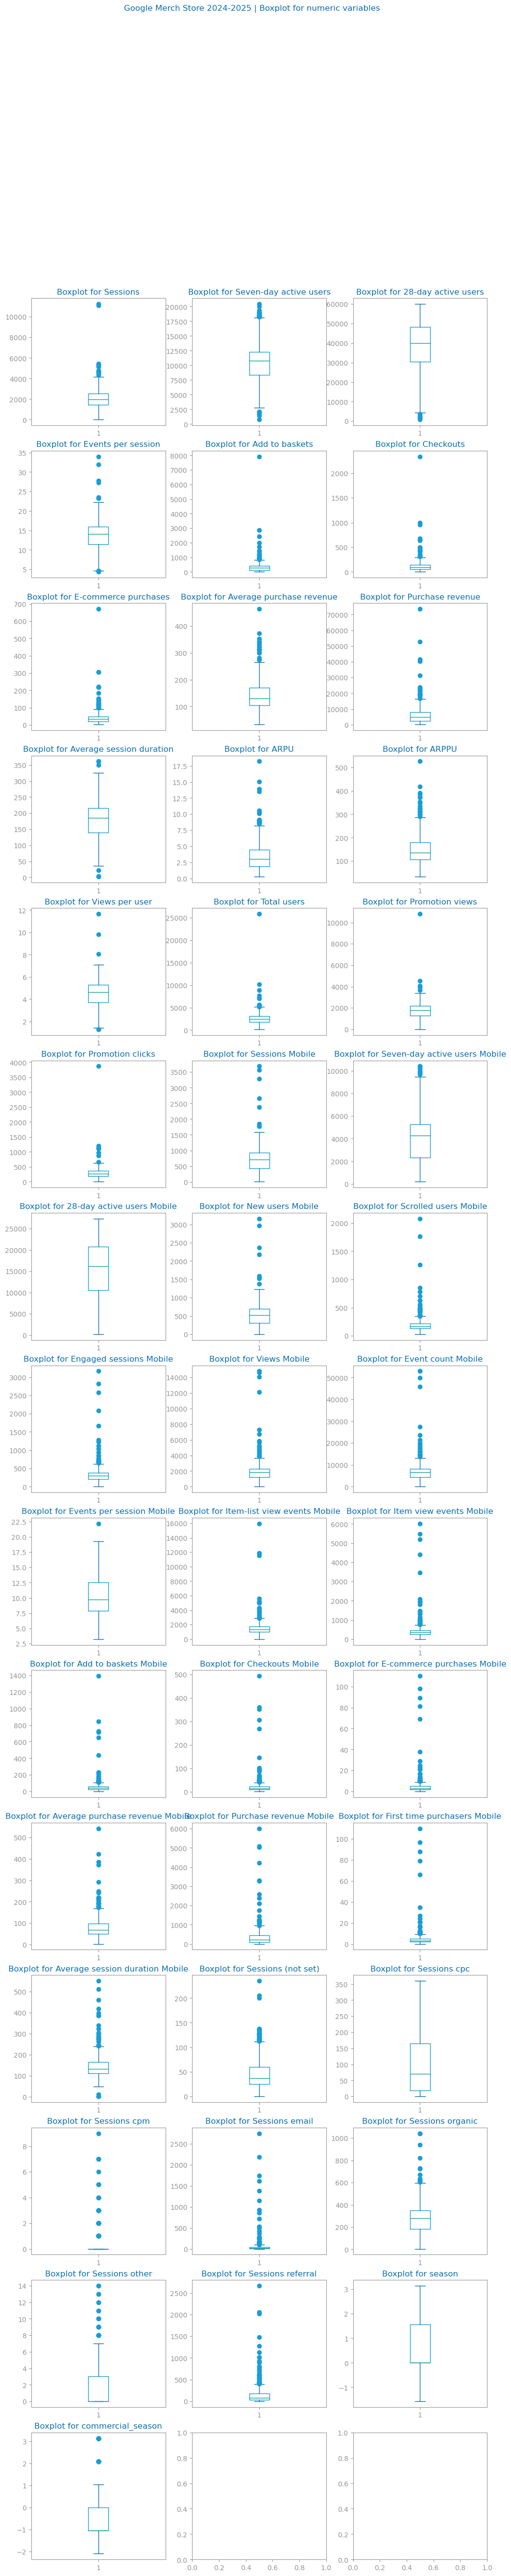

In [12]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

# Correlation Analysis

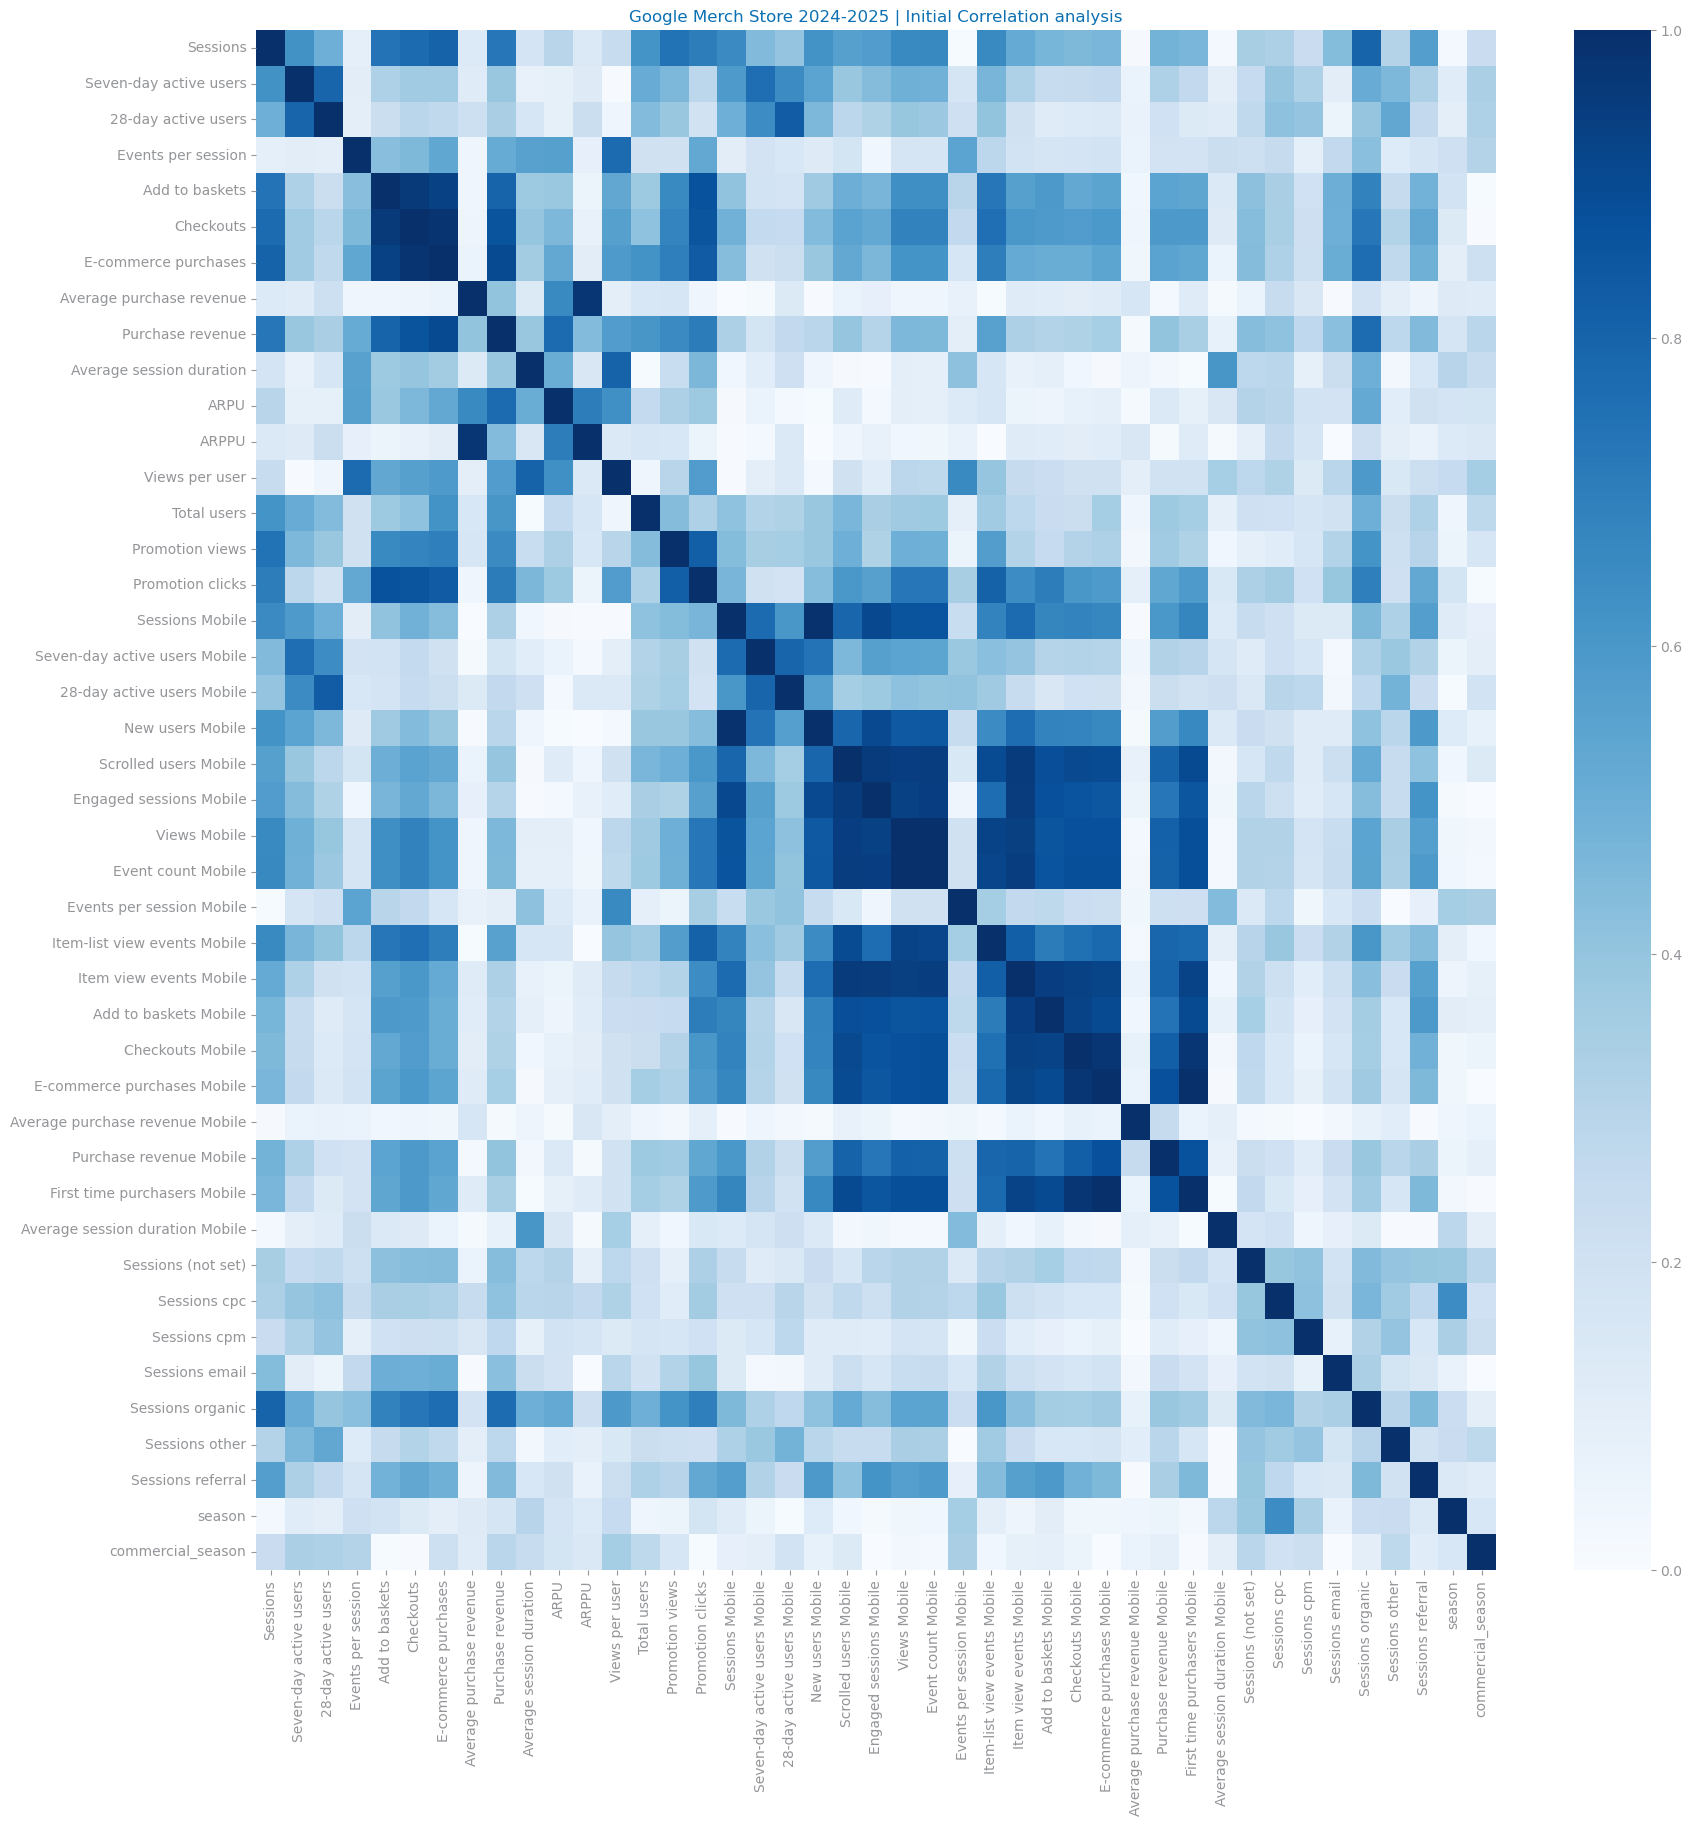

In [13]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure(figsize=(20, 20))  # Increase the figure size
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()

# Series analysis

## Distribution

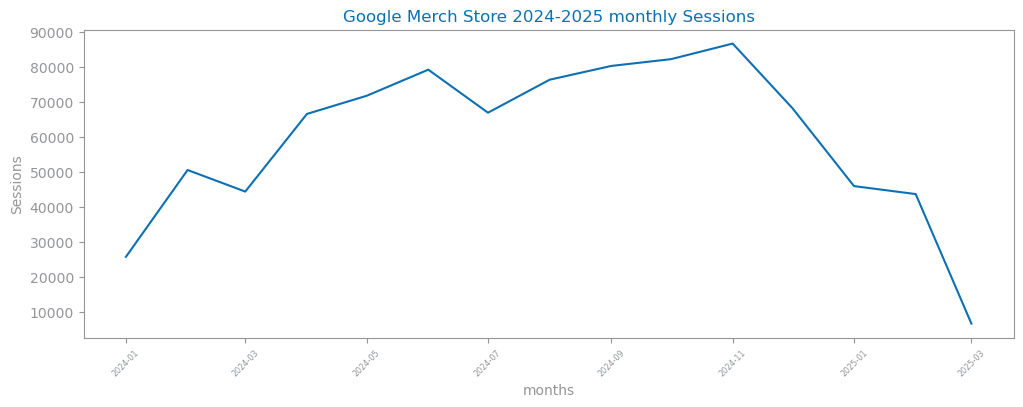

In [14]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)
show()

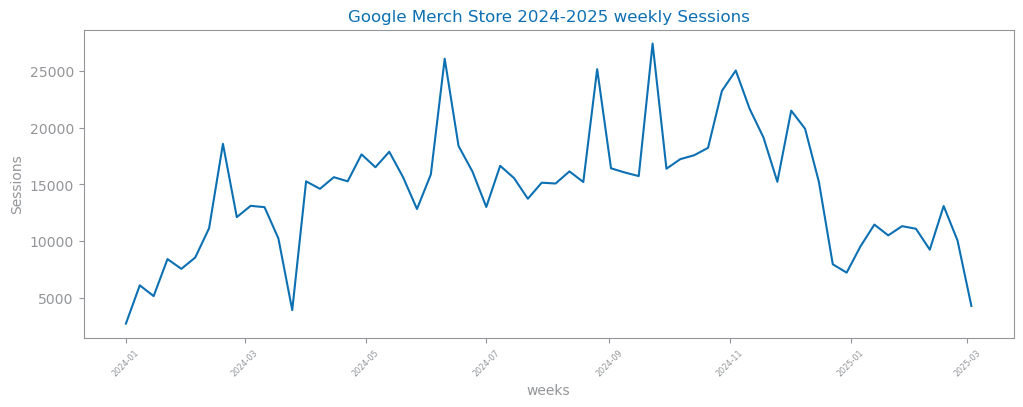

In [15]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

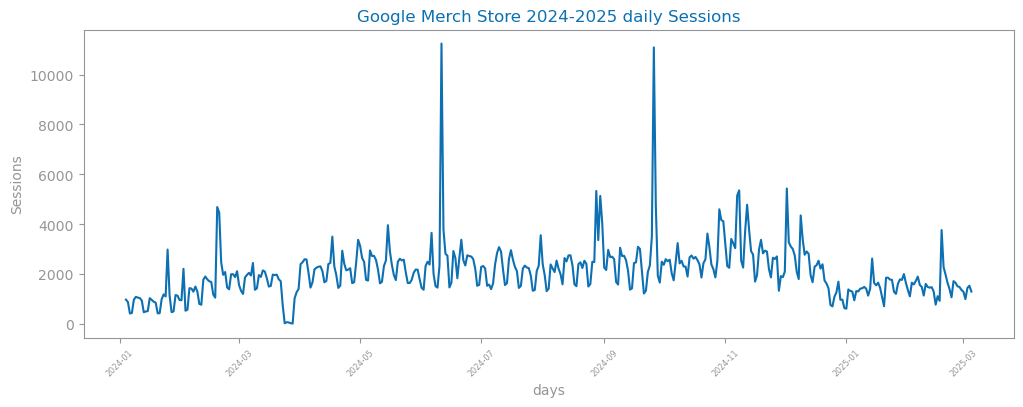

In [16]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()

## Distribution summary 5

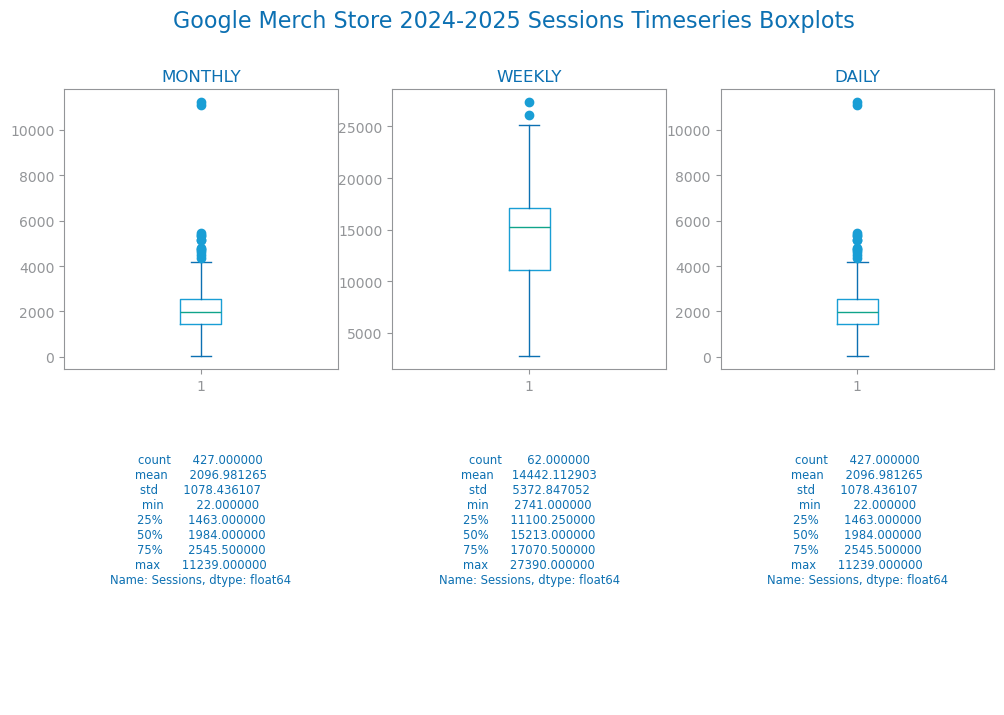

In [17]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels
fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(3 * HEIGHT, 2 * HEIGHT))

# Add subtitle to the figure
fig.suptitle(f"{file_tag} {target} Timeseries Boxplots", fontsize=16)


set_chart_labels(axs[0, 0], title="MONTHLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="WEEKLY")
axs[0, 1].boxplot(ss_weeks)
set_chart_labels(axs[0, 2], title="DAILY")
axs[0, 2].boxplot(ss_days)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 1].grid(False)
axs[1, 1].set_axis_off()

# Add descriptions below each boxplot
descriptions = [
    str(series.describe()),
    str(ss_weeks.describe()),
    str(ss_days.describe())
]

for i, ax in enumerate(axs.flat[:3]):
    ax.text(0.5, -0.3, descriptions[i], transform=ax.transAxes, fontsize="small", ha="center", va="top")

# axs[1, 2].text(0.5, 0.5, str(series.describe()), transform=axs[1, 2].transAxes, fontsize="small", ha="center", va="center", wrap=True)
axs[1, 2].set_axis_off()

show()


## Variables Distribution

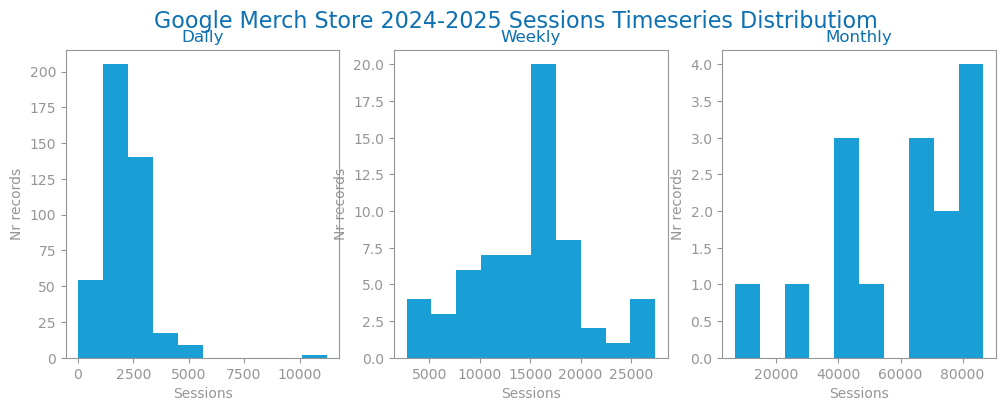

In [18]:

grans: list[Series] = [ss_days, ss_weeks, ss_months]
gran_names: list[str] = ["Daily", "Weekly", "Monthly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target} Timeseries Distributiom", fontsize=16)

for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

## Series Decomposition

https://www.youtube.com/watch?v=7UPgcI0ebi4
https://www.youtube.com/watch?v=_z-a6WoNC2s
https://www.youtube.com/watch?v=ca0rDWo7IpI


- There is seasonality (between days of week)
- There are 2 main cycles:
    - 2024 with a trend of more Sessions increasing until Christmas
    - 2025 with less sessions than 2024 for the same months

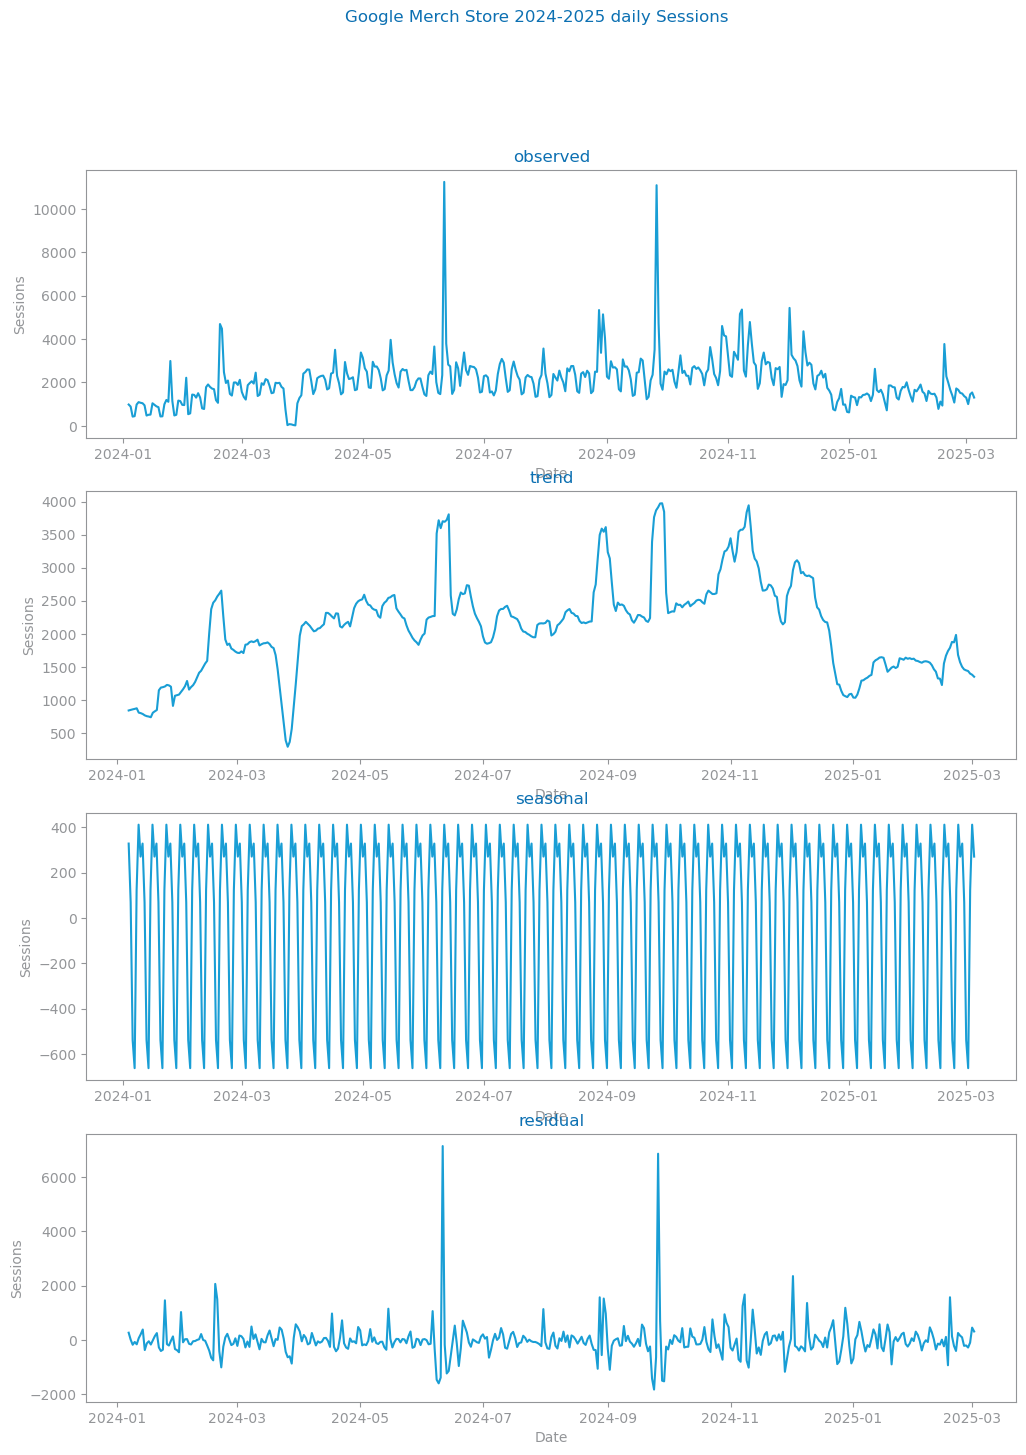

In [19]:


plot_components(
    series,
    title=f"{file_tag} daily {target}",
    x_label=series.index.name,
    y_label=target,
)
show()

## Stationary Study

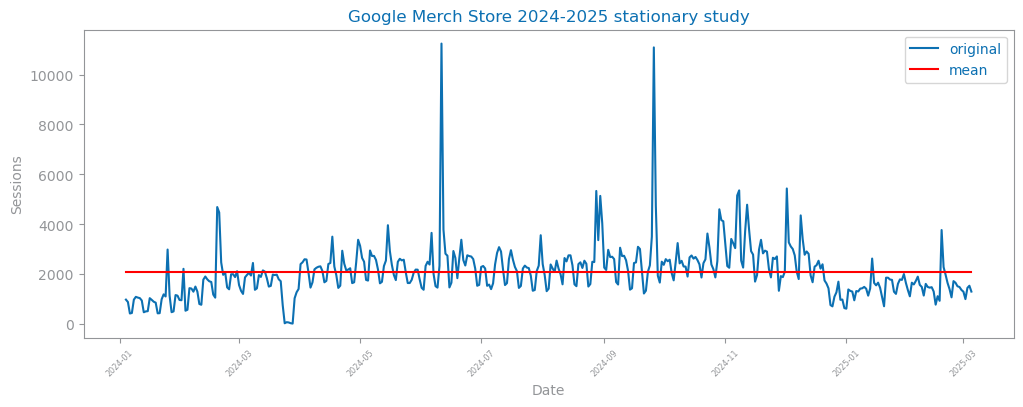

In [20]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(series)
plot(series.index, [series.mean()] * n, "r-", label="mean")
legend()
show()

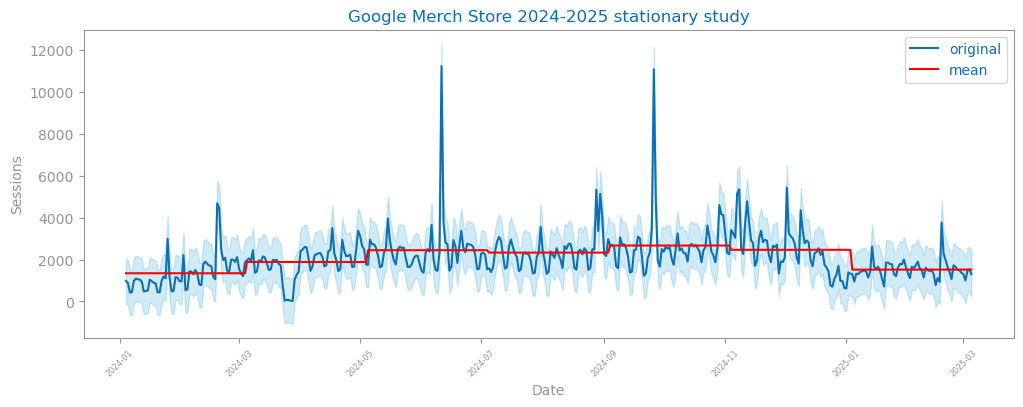

In [21]:
BINS = 7
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = series[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
    show_stdev=True,
)
n: int = len(series)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()

In [22]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(series: Series) -> bool:
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series {('is' if eval_stationarity(series) else 'is not')} stationary")

ADF Statistic: -3.788
p-value: 0.003
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
The series is stationary


## Autocorrelation

<Axes: ylabel='Sessions'>

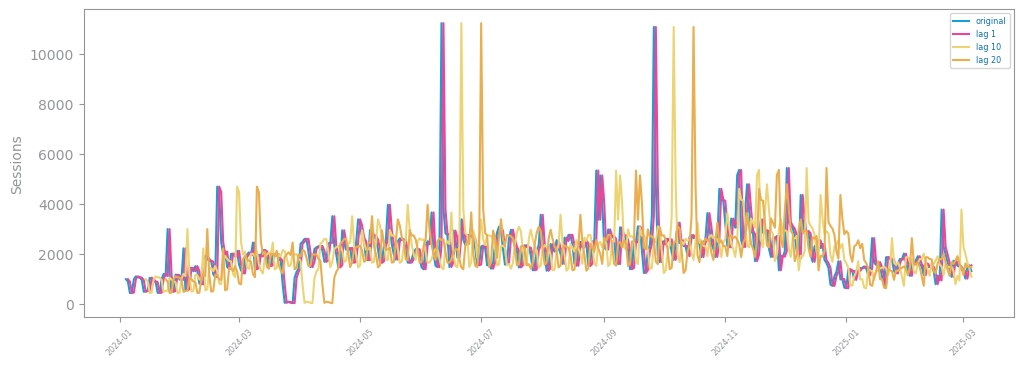

In [23]:


figure(figsize=(3 * HEIGHT, HEIGHT))

# available in data_functions.py
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, ylabel=target)

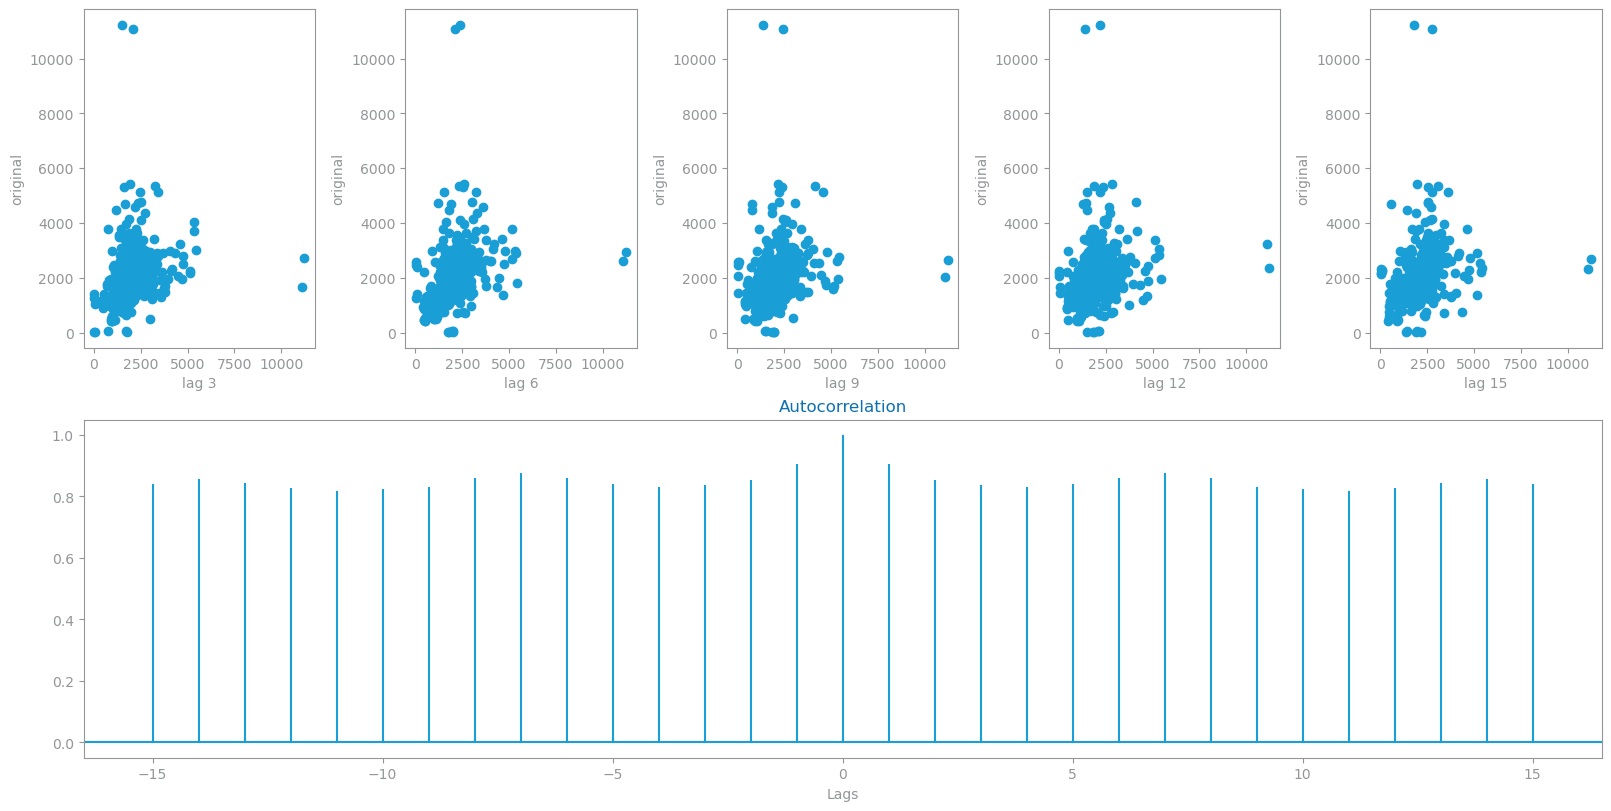

In [31]:
# available in data_functions.py


autocorrelation_study(series, 15, 3)